# Linea C

Hipotesis: La cercania a las estaciones de la linea C influye en el precio de las propiedades, para esto tomaremos los barrios que son recorridos por la linea C y veremos si la distancia a las paradas de est influye en el precio de las propiedades. Primer aproach, tomamos cada barrio vemos cuales son las distnacia de sus propiedades a las paradas y tomamos la menor luego realizamos un scatter plot con estos datos y vemos si la distribucion del precio influye en esta


subte C: Retiro, San nicolas, Monserrat, Constitucion

In [84]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True

#Data de properati
df = pd.read_csv('/home/matias/Escritorio/notebook/properati-AR-2017-08-01-properties-sell.csv')

#Filtramos solo las propiedades de Capital Federal
propCF = df[df['state_name']== 'Capital Federal']

propCFf = propCF[['property_type','place_name','rooms','lat','lon','price']]

propRecorridoC= propCFf[propCFf.place_name.str.contains('San Nicolas') |
                        propCFf.place_name.str.contains('Monserrat')|
                        propCFf.place_name.str.contains('Retiro')|
                        propCFf.place_name.str.contains('Constitucion')]

propRecorridoC.dropna(inplace = True)
propRecorridoC.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 358 to 186022
Data columns (total 6 columns):
property_type    497 non-null object
place_name       497 non-null object
rooms            497 non-null float64
lat              497 non-null float64
lon              497 non-null float64
price            497 non-null float64
dtypes: float64(4), object(2)
memory usage: 27.2+ KB


/home/matias/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [85]:
df = pd.read_csv('/home/matias/Escritorio/notebook/estaciones-de-subte.csv')
df.head()

estacionesC = df[df['LINEA'] == 'C']
estacionesC.head(20)

,X,Y,ID,ESTACION,LINEA
12,-58.374018,-34.591194,13.0,RETIRO,C
13,-58.378156,-34.601770,14.0,LAVALLE,C
14,-58.379530,-34.604844,15.0,DIAGONAL NORTE,C
15,-58.380611,-34.608983,16.0,AV. DE MAYO,C
16,-58.380444,-34.612617,17.0,MORENO,C
17,-58.380174,-34.618126,18.0,INDEPENDENCIA,C
18,-58.381434,-34.627619,19.0,CONSTITUCION,C
56,-58.377819,-34.595057,57.0,SAN MARTIN,C
57,-58.379921,-34.621917,58.0,SAN JUAN,C


In [86]:
i = 1
for index, row in estacionesC.iterrows():
    lon = estacionesC.loc[index,'X']
    lat = estacionesC.loc[index,'Y']
    label = str(i)
    propRecorridoC['lon' + label] = lon
    propRecorridoC['lat' + label] = lat
    i = i+1
    



/home/matias/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/matias/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [87]:
propRecorridoC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 358 to 186022
Data columns (total 24 columns):
property_type    497 non-null object
place_name       497 non-null object
rooms            497 non-null float64
lat              497 non-null float64
lon              497 non-null float64
price            497 non-null float64
lon1             497 non-null float64
lat1             497 non-null float64
lon2             497 non-null float64
lat2             497 non-null float64
lon3             497 non-null float64
lat3             497 non-null float64
lon4             497 non-null float64
lat4             497 non-null float64
lon5             497 non-null float64
lat5             497 non-null float64
lon6             497 non-null float64
lat6             497 non-null float64
lon7             497 non-null float64
lat7             497 non-null float64
lon8             497 non-null float64
lat8             497 non-null float64
lon9             497 non-null float64
lat9             4

In [88]:
import math

def haversine(lat1, lon1, lat2, lon2):
    rad=math.pi/180
    dlat=lat2-lat1
    dlon=lon2-lon1
    R=6372.795477598
    a=(np.sin(rad*dlat/2))**2 + np.cos(rad*lat1)*np.cos(rad*lat2)*(np.sin(rad*dlon/2))**2
    distancia=2*R*np.arcsin(np.sqrt(a))
    distM = distancia*1000
    return distM

In [89]:

for row in estacionesC.iterrows():
    for i in range(1,10):
        label = str(i)
        lat1 = propRecorridoC['lat'].astype(float)
        lon1 = propRecorridoC['lon'].astype(float)
        lat2 = propRecorridoC['lat'+ label].astype(float)
        lon2 = propRecorridoC['lon'+ label].astype(float)
        #dist = np.absolute(propRecorridoC['lon'] - propRecorridoC['lon'+label]) + np.absolute(propRecorridoC['lat'] - propRecorridoC['lat'+label])
        dist = haversine(lat1,lon1,lat2,lon2)
        propRecorridoC['dist' + label] = dist
        
    

/home/matias/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [90]:
propRecorridoC.head()

,property_type,place_name,rooms,lat,lon,price,lon1,lat1,lon2,lat2,...,lat9,dist1,dist2,dist3,dist4,dist5,dist6,dist7,dist8,dist9
358,store,Monserrat,4.0,-34.617900,-58.388935,190000.0,-58.374018,-34.591194,-58.378156,-34.60177,...,-34.621917,3269.316088,2047.557213,1688.236715,1250.705548,974.316318,802.353577,1280.609804,2736.925998,938.240221
4012,apartment,Monserrat,1.0,-34.609343,-58.376307,72000.0,-58.374018,-34.591194,-58.378156,-34.60177,...,-34.621917,2029.545906,859.195753,580.974184,396.019244,525.421869,1038.973793,2086.267264,1594.986228,1437.096506
7377,apartment,Monserrat,1.0,-34.623008,-58.391356,79700.0,-58.374018,-34.591194,-58.378156,-34.60177,...,-34.621917,3878.217596,2653.329195,2292.071232,1844.102250,1527.491909,1158.691550,1042.975878,3346.702173,1053.665809
8851,apartment,Monserrat,2.0,-34.597621,-58.378354,235000.0,-58.374018,-34.591194,-58.378156,-34.60177,...,-34.621917,817.683700,461.871802,810.579996,1280.602320,1678.963522,2286.766949,3348.551351,289.277525,2706.171577
8871,apartment,Monserrat,1.0,-34.613352,-58.384642,72500.0,-58.374018,-34.591194,-58.378156,-34.60177,...,-34.621917,2649.606356,1418.548996,1055.785811,610.217823,392.881249,670.216460,1613.808663,2128.608156,1046.023676


In [91]:
propRecorridoC['min_dist'] =propRecorridoC.loc[:,['dist1','dist2','dist3','dist4','dist5','dist6',
                                                  'dist7','dist8','dist9']].min(axis=1)
propRecorridoC.head()


/home/matias/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,property_type,place_name,rooms,lat,lon,price,lon1,lat1,lon2,lat2,...,dist1,dist2,dist3,dist4,dist5,dist6,dist7,dist8,dist9,min_dist
358,store,Monserrat,4.0,-34.617900,-58.388935,190000.0,-58.374018,-34.591194,-58.378156,-34.60177,...,3269.316088,2047.557213,1688.236715,1250.705548,974.316318,802.353577,1280.609804,2736.925998,938.240221,802.353577
4012,apartment,Monserrat,1.0,-34.609343,-58.376307,72000.0,-58.374018,-34.591194,-58.378156,-34.60177,...,2029.545906,859.195753,580.974184,396.019244,525.421869,1038.973793,2086.267264,1594.986228,1437.096506,396.019244
7377,apartment,Monserrat,1.0,-34.623008,-58.391356,79700.0,-58.374018,-34.591194,-58.378156,-34.60177,...,3878.217596,2653.329195,2292.071232,1844.102250,1527.491909,1158.691550,1042.975878,3346.702173,1053.665809,1042.975878
8851,apartment,Monserrat,2.0,-34.597621,-58.378354,235000.0,-58.374018,-34.591194,-58.378156,-34.60177,...,817.683700,461.871802,810.579996,1280.602320,1678.963522,2286.766949,3348.551351,289.277525,2706.171577,289.277525
8871,apartment,Monserrat,1.0,-34.613352,-58.384642,72500.0,-58.374018,-34.591194,-58.378156,-34.60177,...,2649.606356,1418.548996,1055.785811,610.217823,392.881249,670.216460,1613.808663,2128.608156,1046.023676,392.881249


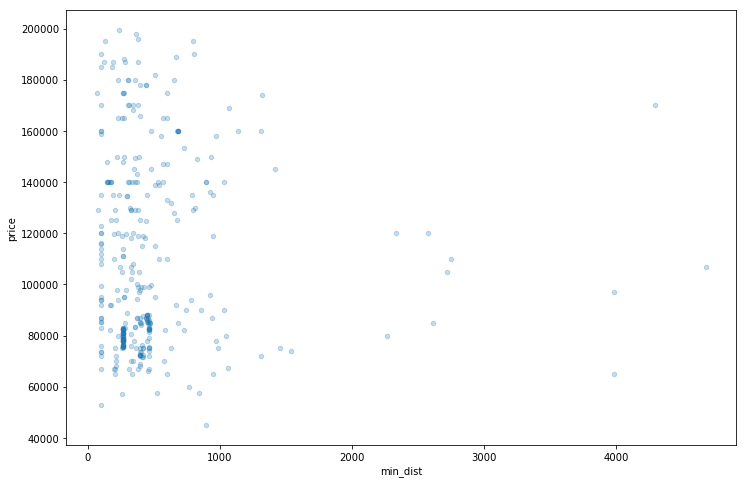

In [92]:
%matplotlib inline
propRecorridoC1 = propRecorridoC[propRecorridoC['price']< 200000]
#propRecorridoC2 = propRecorridoC1[propRecorridoC['min_dist']< 0.03]
propRecorridoC1.plot.scatter('min_dist', 'price',alpha=0.25, figsize=(12,8))
